In [3]:
!pip install numpy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.7 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 310.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 187.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 315.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 131.8 MB/s eta 0:00:00


In [9]:
import numpy as np
import math, random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def single_neuron_regression_model(w, w_0, x):
    # Perform the dot product on the input x and the learned weights w
    z = 0
    for feature, weight in zip(x, w):
        z += feature * weight
    z += w_0  #Add the bias term
    
    # Apply the activation function, and return
    a = sigmoid(z)
    return a

# simple linear activiation function: just returns identity
def sigmoid(z):
    non_zero_tolerance = 1e-8 # add this to divisions to ensure we don't divide by 0
    return 1 / (1 + math.exp(-z) + non_zero_tolerance)


In [10]:
x = [1, 2]
w = [0.1, 0.1]
w_0 = 0

y = single_neuron_regression_model(w, w_0, x)
print("input", x, "=> output", y)

input [1, 2] => output 0.574442513511817


<function matplotlib.pyplot.show(close=None, block=None)>

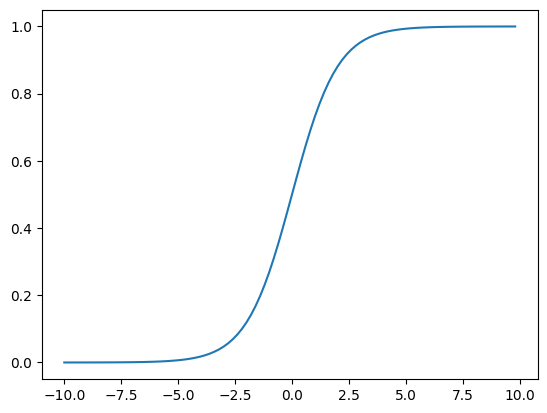

In [11]:
sig_x = np.arange(-10, 10, .2)
sig_y = [sigmoid(x) for x in sig_x]
plt.plot(sig_x, sig_y)
plt.show

In [15]:
def train_model_NLL_loss(model_function, w, w_0, 
                         input_data, output_data, 
                         learning_rate, num_epochs):
    non_zero_tolerance = 1e-8 # add this to log calculations to ensure we don't take the log of 0
    do_print = False
    for epoch in range(num_epochs):
        total_loss = 0 #keep track of total loss across the data set
        for x, y in zip(input_data, output_data):
            y_predicted = model_function(w, w_0, x)
            nll_loss = -(y * math.log(y_predicted + non_zero_tolerance) + (1-y) * math.log(1-y_predicted + non_zero_tolerance))
            
            total_loss += nll_loss
            if do_print: print("x:", x, "y:", y, "nll_loss:", nll_loss)
            if do_print: print(" old weights:", w, w_0)

            # update bias coefficent using gradient w.r.t w_0
            w_0 -= learning_rate * (y_predicted - y)
            
            # update other model coefficients using gradient w.r.t that coeff
            for j, x_j in enumerate(x):
                w[j] -= learning_rate * (y_predicted - y) * x_j
                
            if do_print: print(" new weights:", w, w_0)
            
        report_every = max(1, num_epochs // 10)
        if epoch % report_every == 0: #every few epochs, report on progress
            print("epoch", epoch, "has total loss", total_loss)
           
    return w, w_0

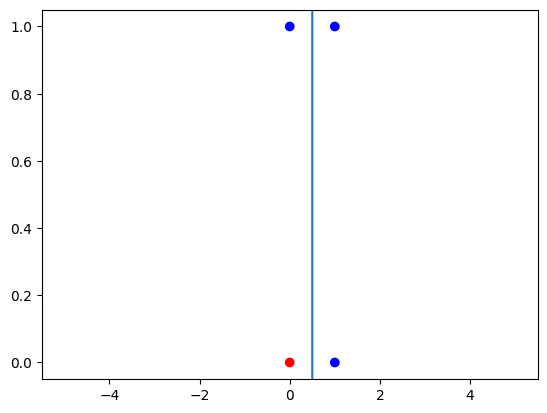

In [25]:
# Here we have a dataset of 2D linearly separable datapoints
input_data = [[0, 0],[1, 1],[1, 0],[0, 1]]
# And their corresponding labels
labels = [0, 1, 1, 1]

# This utility function will allow us to visualize a given 2D dataset.
# You don't need to understand this code right now.
def plot_dataset_2D(x, y):
    x_np = np.array(x)
    x_np.reshape(len(x), 2)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    plt.scatter(x_np[...,0], x_np[...,1], color=colors)

# This utility function will allow us to visualize a 2D decision boundary
def plot_decision_boundary_2D(w, w_0):
    ylim = plt.ylim()
    x1 = np.arange(-5,6)
    plt.plot(x1, (-w_0 - w[0]*x1)/w[1])
    plt.ylim(ylim)

def evaluate_classification_accuracy(model_function, w, w_0, input_data, labels):
    # Count the number of correctly classified samples given a set of weights
    correct = 0
    n = len(input_data)
    for x, y in zip(input_data, labels):
        y_predicted = model_function(w, w_0, x)
        label_predicted = 1 if y_predicted > 0.5 else 0
        if label_predicted == y:
            correct += 1
        else:
            print("Misclassify", x, y, "with activation", y_predicted)
    accuracy = correct / n
    print("Our model predicted", correct, "out of", n, 
          "correctly for", accuracy*100, "% accuracy")
    return accuracy

# Visualize the above dataset
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D([1, 0.0001], -0.5)



epoch 0 has total loss 2.7775961563873945
epoch 500 has total loss 1.0696290299372877
epoch 1000 has total loss 0.7308344970036
epoch 1500 has total loss 0.5485621478663054
epoch 2000 has total loss 0.4360049626276292
epoch 2500 has total loss 0.3601731270838312
epoch 3000 has total loss 0.30591566026925265
epoch 3500 has total loss 0.26533433166608056
epoch 4000 has total loss 0.23392797193159465
epoch 4500 has total loss 0.20895438442735012

Final weights:
[5.365368141605033, 5.357508122427056] -2.183613464676327
Our model predicted 4 out of 4 correctly for 100.0 % accuracy


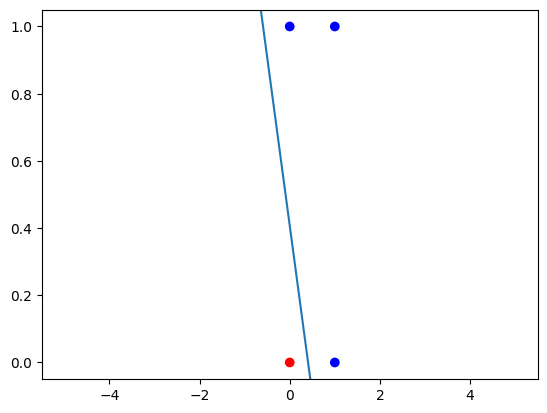

In [38]:
# In this example we set the initial weights to zero and the learning rate 
# relatively small. However, we only train for a few epochs which is not 
# enough to converge on an accurate classifier.
w_0 = 0
w = [0.2, -0.2]
learning_rate = 0.01
epochs = 5000

w, w_0 = train_model_NLL_loss(single_neuron_regression_model, w, w_0,
                              input_data, labels, 
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_regression_model, w, w_0, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(w, w_0)

epoch 0 has total loss 2.7876225242403487
epoch 500 has total loss 1.457935273677029
epoch 1000 has total loss 1.0405204313736882
epoch 1500 has total loss 0.8173119545592457
epoch 2000 has total loss 0.6745210632170076
epoch 2500 has total loss 0.5741749652493746
epoch 3000 has total loss 0.49946918430114684
epoch 3500 has total loss 0.4416065118263051
epoch 4000 has total loss 0.39545871343042893
epoch 4500 has total loss 0.3578067828609526

Final weights:
[4.239205112676078, 4.239929906121907] -6.552369519167407
Our model predicted 4 out of 4 correctly for 100.0 % accuracy


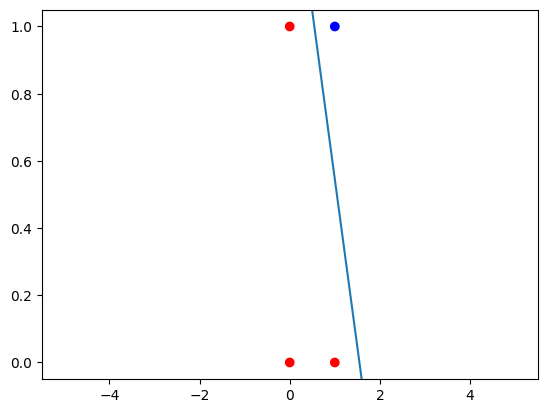

In [39]:
# Here we have a dataset of 2D linearly separable datapoints
input_data = [[0, 0],[1, 1],[1, 0],[0, 1]]
# And their corresponding labels
labels = [0, 1, 0, 0]
w_0 = 0
w = [0.2, -0.2]
learning_rate = 0.01
epochs = 5000

w, w_0 = train_model_NLL_loss(single_neuron_regression_model, w, w_0,
                              input_data, labels, 
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_regression_model, w, w_0, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(w, w_0)

epoch 0 has total loss 2.792597075054207
epoch 5000 has total loss 2.7826262666637986
epoch 10000 has total loss 2.7826262672640536
epoch 15000 has total loss 2.7826262672639324
epoch 20000 has total loss 2.7826262672639324
epoch 25000 has total loss 2.7826262672639324
epoch 30000 has total loss 2.7826262672639324
epoch 35000 has total loss 2.7826262672639324
epoch 40000 has total loss 2.7826262672639324
epoch 45000 has total loss 2.7826262672639324

Final weights:
[-0.005012531301891763, -2.402592014227878e-16] -0.005012521301765671
Misclassify [0, 0] 1 with activation 0.4987468698108478
Misclassify [1, 1] 1 with activation 0.497493755364179
Our model predicted 2 out of 4 correctly for 50.0 % accuracy


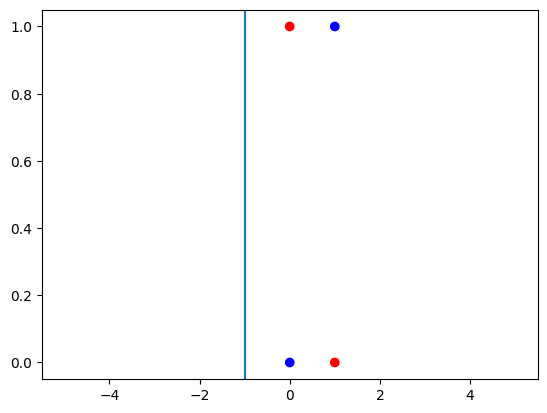

In [41]:
# Here we have a dataset of 2D linearly separable datapoints
input_data = [[0, 0],[1, 1],[1, 0],[0, 1]]
# And their corresponding labels
labels = [1, 1, 0, 0]
w_0 = 0
w = [0.2, -0.2]
learning_rate = 0.01
epochs = 50000

w, w_0 = train_model_NLL_loss(single_neuron_regression_model, w, w_0,
                              input_data, labels, 
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_regression_model, w, w_0, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(w, w_0)

In [49]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, num_inputs, num_hidden, num_output):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_output = num_output
        
        # Initialize the weights with random values
        self.weights_hidden = np.random.randn(self.num_inputs, self.num_hidden)
        self.weights_output = np.random.randn(self.num_hidden, self.num_output)
        
        # Initialize the biases with zeros
        self.biases_hidden = np.zeros((1, self.num_hidden))
        self.biases_output = np.zeros((1, self.num_output))
    
    def forward_propagation(self, inputs):
        # Compute the activation of the hidden layer
        hidden_layer = sigmoid(np.dot(inputs, self.weights_hidden) + self.biases_hidden)
        
        # Compute the activation of the output layer
        output_layer = sigmoid(np.dot(hidden_layer, self.weights_output) + self.biases_output)
        
        return hidden_layer, output_layer
    
    def backpropagation(self, inputs, targets, hidden_layer, output_layer, learning_rate):
        # Compute the error in the output layer
        output_error = targets - output_layer
        
        # Compute the gradient of the error with respect to the output layer weights and biases
        output_delta = output_error * sigmoid_derivative(output_layer)
        
        # Compute the error in the hidden layer
        hidden_error = np.dot(output_delta, self.weights_output.T)
        
        # Compute the gradient of the error with respect to the hidden layer weights and biases
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)
        
        # Update the weights and biases using gradient descent
        self.weights_output += np.dot(hidden_layer.T, output_delta) * learning_rate
        self.biases_output += np.sum(output_delta, axis=0) * learning_rate
        self.weights_hidden += np.dot(inputs.T, hidden_delta) * learning_rate
        self.biases_hidden += np.sum(hidden_delta, axis=0) * learning_rate
    
    def train(self, inputs, targets, num_epochs, learning_rate):
        for epoch in range(num_epochs):
            # Perform forward propagation
            hidden_layer, output_layer = self.forward_propagation(inputs)
            
            # Perform backpropagation and update the weights and biases
            self.backpropagation(inputs, targets, hidden_layer, output_layer, learning_rate)
            
            # Print the mean squared error for monitoring the training progress
            mse = np.mean(np.square(targets - output_layer))
            # print(f"Epoch {epoch + 1}/{num_epochs}, Mean Squared Error: {mse:.4f}")
    
    def predict(self, inputs):
        _, output = self.forward_propagation(inputs)
        return output

# Example usage
# Create a neural network with 2 inputs, 3 hidden neurons, and 1 output neuron
network = NeuralNetwork(2, 3, 1)

# Training data (inputs and corresponding targets)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])
learning_rate = 0.1
# Train the network for 1000 epochs with a learning rate of 0.1
network.train(inputs, targets, num_epochs=10000, learning_rate=0.1)
print(network.forward_propagation(inputs[0])[1])
print(network.forward_propagation(inputs[1])[1])
print(network.forward_propagation(inputs[2])[1])
print(network.forward_propagation(inputs[3])[1])


[[0.03352691]]
[[0.9333741]]
[[0.95271584]]
[[0.06687878]]
